In [ ]:
ff
from IPython.display import Image
Image(url='https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png', width=850)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('Iris_Dataset.csv')
df.head()

In [ ]:
df = df.rename(columns={'SepalLengthCm':'Sepal_Length',
                      'SepalWidthCm':'Sepal_Width',
                      'PetalLengthCm':'Petal_Length',
                      'PetalWidthCm':'Petal_Width'
                      })

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df['Species'].value_counts()

In [ ]:
df.describe()

In [ ]:
# prompt: create a scatter plot for seapl legnth and width via sns

import matplotlib.pyplot as plt
sns.FacetGrid(df, hue="Species", height=5) \
   .map(plt.scatter, "Petal_Length", "Sepal_Width") \
   .add_legend()
plt.show()

In [ ]:
# prompt: create a sctatter plot for this now :Petal Length vs Petal Width

import matplotlib.pyplot as plt
sns.FacetGrid(df, hue="Species", height=5) \
   .map(plt.scatter, "Petal_Length", "Petal_Width") \
   .add_legend()
plt.show()

In [ ]:
# prompt: Sepal Length vs Sepal Width

import matplotlib.pyplot as plt
sns.FacetGrid(df, hue="Species", height=5) \
   .map(plt.scatter, "Sepal_Length", "Sepal_Width") \
   .add_legend()
plt.show()

In [ ]:
# prompt: sepal length vs petal width

import matplotlib.pyplot as plt
sns.FacetGrid(df, hue="Species", height=5) \
   .map(plt.scatter, "Sepal_Length", "Petal_Width") \
   .add_legend()
plt.show()

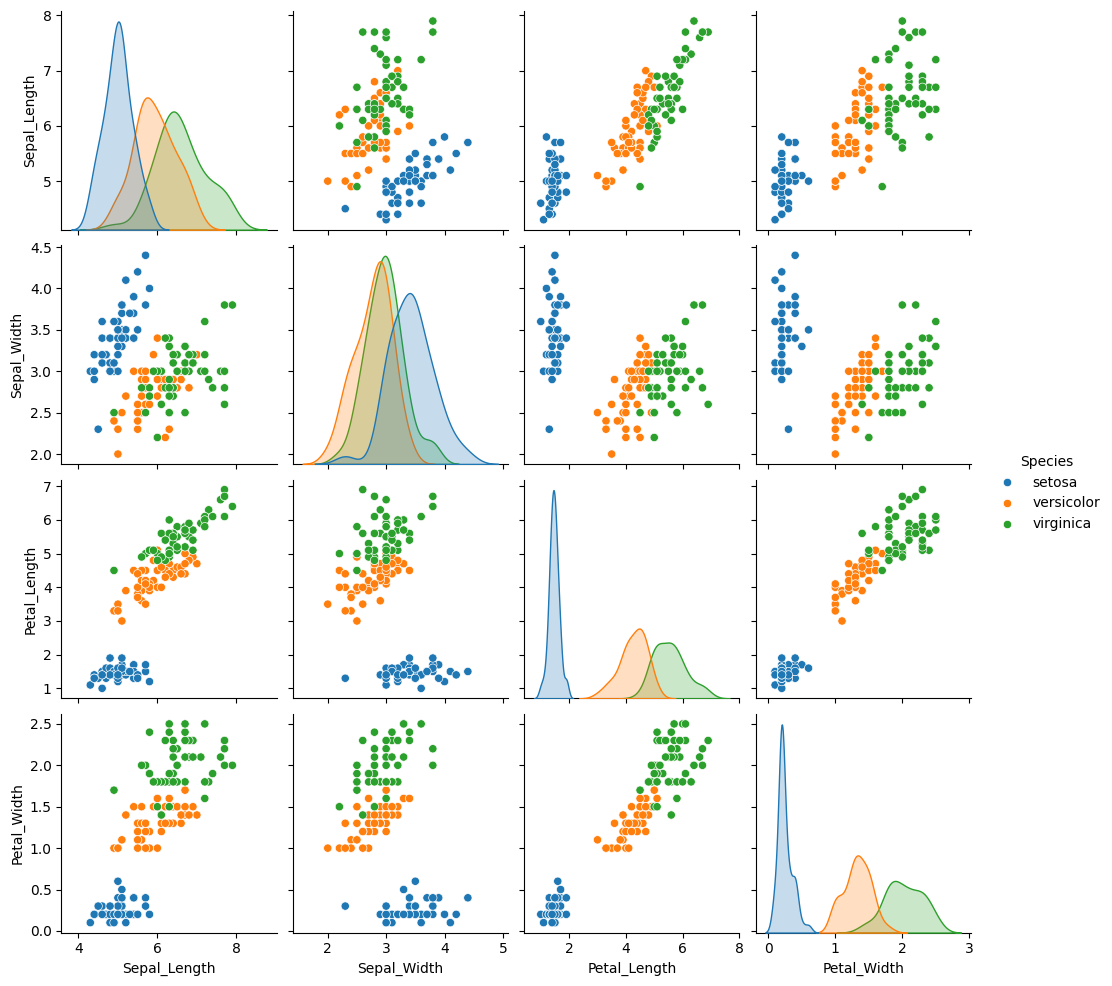

In [ ]:
sns.pairplot(df[['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species']], hue="Species",diag_kind='kde')


In [ ]:

# Separate features and target
data=df.values

# slicing the matrices
X=data[:,0:4]
Y=data[:,5]


In [ ]:

print(X.shape)
print(X)

(0, 4)
[]


In [ ]:

print(Y.shape)
print(Y)

(0,)
[]


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# Load iris dataset into DataFrame
iris = load_iris()
df = pd.DataFrame(iris.data, columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
df['Species'] = [iris.target_names[i] for i in iris.target]

# 🔍 Step 1: Check actual unique values in Species column
print("✅ Unique Species values BEFORE mapping:", df['Species'].unique())

# 🔧 Step 2: Apply correct mapping based on actual strings
# Since the values are ['setosa', 'versicolor', 'virginica'], we use this mapping:
flower_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}

# 🗺️ Step 3: Apply mapping
df['Species_mapped'] = df['Species'].map(flower_mapping)

# ❗ Step 4: Check for any unmapped values (i.e., NaNs)
nan_count = df['Species_mapped'].isna().sum()
print(f"❗ NaNs in Species_mapped: {nan_count}")
if nan_count > 0:
    print("❌ Some species names did not match the mapping. Fix the mapping first.")
    print(df[df['Species_mapped'].isna()])
else:
    print("✅ Mapping successful. No NaNs found.")

# 🧼 Step 5: Drop NaNs (safety)
df = df.dropna(subset=['Species_mapped'])

# ✅ Step 6: Create feature and label arrays
X = df[['Petal_Length', 'Petal_Width']].values
y = df['Species_mapped'].values

# ✅ Step 7: Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

print("✅ train_test_split successful. Shapes:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)


✅ Unique Species values BEFORE mapping: [np.str_('setosa') np.str_('versicolor') np.str_('virginica')]
❗ NaNs in Species_mapped: 0
✅ Mapping successful. No NaNs found.
✅ train_test_split successful. Shapes:
X_train: (105, 2) y_train: (105,)


# **MODEL 1: SUPPORT VECTOR MACHINE ALGORITHM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 🔁 Step 1: Train SVM model
model_svc = SVC(kernel='linear')  # you can also try 'rbf' or 'poly'
model_svc.fit(X_train, y_train)

# 🔍 Step 2: Predict on test data
prediction_svc = model_svc.predict(X_test)

# 🎯 Step 3: Accuracy and report
acc_svc = accuracy_score(y_test, prediction_svc)
print(f"✅ SVM Accuracy: {acc_svc:.2f}")
print("\n📊 Classification Report (SVM):")
print(classification_report(y_test, prediction_svc, target_names=['Setosa', 'Versicolor', 'Virginica']))


✅ SVM Accuracy: 0.93

📊 Classification Report (SVM):
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       0.88      0.93      0.90        15
   Virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



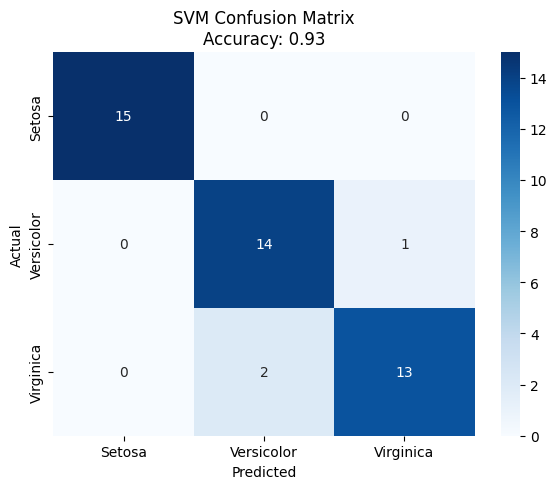

In [ ]:
cm = confusion_matrix(y_test, prediction_svc)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"SVM Confusion Matrix\nAccuracy: {acc_svc:.2f}")
plt.tight_layout()
plt.show()


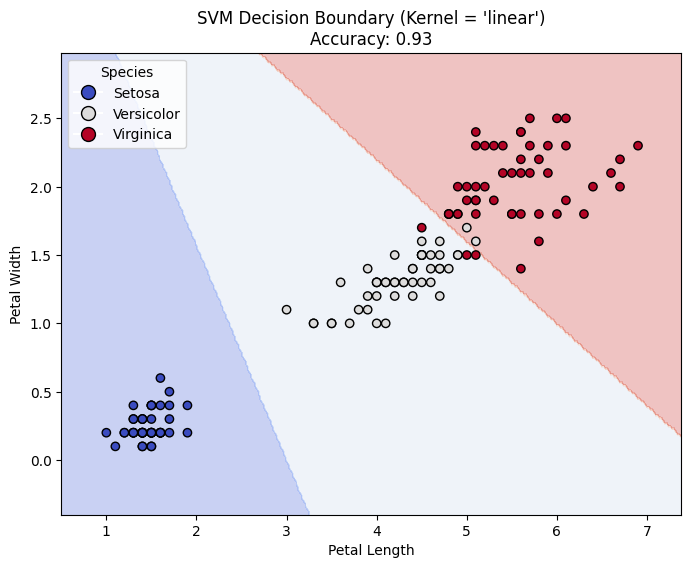

In [ ]:
# Combine train + test for full decision boundary
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

# Meshgrid for plotting
x_min, x_max = X_combined[:, 0].min() - 0.5, X_combined[:, 0].max() + 0.5
y_min, y_max = X_combined[:, 1].min() - 0.5, X_combined[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict over the grid
Z = model_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
scatter = plt.scatter(X_combined[:, 0], X_combined[:, 1], c=y_combined,
                      cmap=plt.cm.coolwarm, edgecolors='k')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title(f"SVM Decision Boundary (Kernel = 'linear')\nAccuracy: {acc_svc:.2f}")

# Legend fix
legend_labels = ['Setosa', 'Versicolor', 'Virginica']
colors = [plt.cm.coolwarm(i / 2) for i in range(3)]
handles = [plt.Line2D([], [], marker='o', color='w', label=legend_labels[i],
                      markerfacecolor=colors[i], markersize=10, markeredgecolor='k') for i in range(3)]
plt.legend(handles=handles, title="Species")

plt.show()


# **MODEL 2: LOGISTIC REGRESSION**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


✅ Accuracy: 0.96

📊 Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       0.93      0.93      0.93        15
   Virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



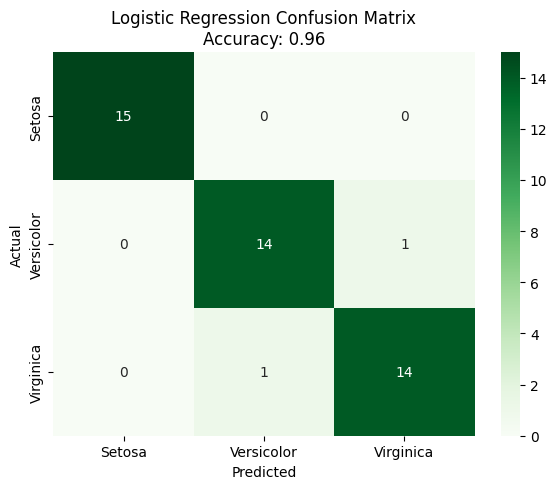

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 🔁 Step 1: Train the model
model_logistic = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=200)
model_logistic.fit(X_train, y_train)

# 🔍 Step 2: Predict on test set
prediction = model_logistic.predict(X_test)

# 🎯 Step 3: Accuracy
acc = accuracy_score(y_test, prediction)
print(f"✅ Accuracy: {acc:.2f}")

# 📋 Step 4: Classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, prediction, target_names=['Setosa', 'Versicolor', 'Virginica']))

# 🔥 Step 5: Confusion Matrix Plot
cm = confusion_matrix(y_test, prediction)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Logistic Regression Confusion Matrix\nAccuracy: {acc:.2f}")
plt.tight_layout()
plt.show()


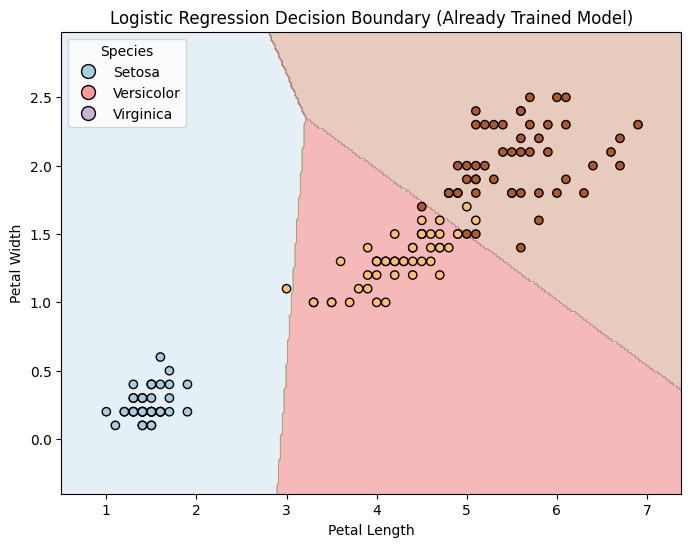

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 🧱 Combine X and y for full coverage
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

# 🗺️ Create meshgrid over the feature space
x_min, x_max = X_combined[:, 0].min() - 0.5, X_combined[:, 0].max() + 0.5
y_min, y_max = X_combined[:, 1].min() - 0.5, X_combined[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 🔮 Predict on grid using the already trained model
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model_logistic.predict(grid_points)
Z = Z.reshape(xx.shape)

# 🎨 Plot decision regions
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

# ⚫ Plot actual points
plt.scatter(X_combined[:, 0], X_combined[:, 1], c=y_combined, edgecolors='k', cmap=plt.cm.Paired)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Logistic Regression Decision Boundary (Already Trained Model)')

# 🧾 Add legend
from matplotlib.lines import Line2D
legend_labels = ['Setosa', 'Versicolor', 'Virginica']
colors = [plt.cm.Paired(i / 3) for i in range(3)]
handles = [Line2D([], [], marker='o', color='w', label=legend_labels[i],
                  markerfacecolor=colors[i], markersize=10, markeredgecolor='k') for i in range(3)]
plt.legend(handles=handles, title="Species")

plt.show()


# MODEL3: DECISION TREE **CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# ✅ Step 1: Train the Decision Tree
model_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
model_tree.fit(X_train, y_train)

# 🔍 Step 2: Predict
prediction_tree = model_tree.predict(X_test)

# 🎯 Step 3: Accuracy & Report
acc_tree = accuracy_score(y_test, prediction_tree)
print(f"🌳 Decision Tree Accuracy: {acc_tree:.2f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, prediction_tree, target_names=['Setosa', 'Versicolor', 'Virginica']))


🌳 Decision Tree Accuracy: 0.93

📊 Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       0.88      0.93      0.90        15
   Virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



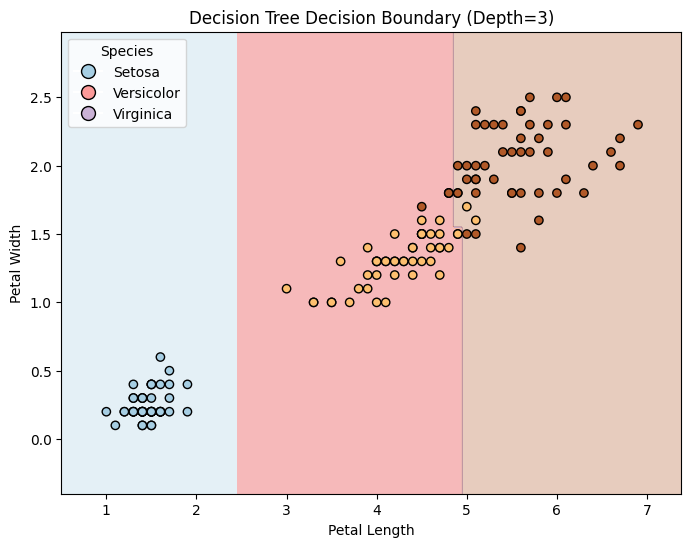

In [ ]:
# Combine train + test data
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

# Meshgrid
x_min, x_max = X_combined[:, 0].min() - 0.5, X_combined[:, 0].max() + 0.5
y_min, y_max = X_combined[:, 1].min() - 0.5, X_combined[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict over grid
Z = model_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

scatter = plt.scatter(X_combined[:, 0], X_combined[:, 1], c=y_combined, cmap=plt.cm.Paired, edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Decision Tree Decision Boundary (Depth=3)')

# Legend
from matplotlib.lines import Line2D
legend_labels = ['Setosa', 'Versicolor', 'Virginica']
colors = [plt.cm.Paired(i / 3) for i in range(3)]
handles = [Line2D([], [], marker='o', color='w', label=legend_labels[i],
                  markerfacecolor=colors[i], markersize=10, markeredgecolor='k') for i in range(3)]
plt.legend(handles=handles, title="Species")

plt.show()


In [ ]:
import gradio as gr
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 🔃 Load and prepare data (2 features only)
iris = load_iris()
X = iris.data[:, [2, 3]]  # Petal Length and Petal Width
y = iris.target

model = LogisticRegression(max_iter=200)
model.fit(X, y)

# 🌸 Flower name mapping
classes = ['Setosa', 'Versicolor', 'Virginica']
images = {
    'Setosa': 'https://upload.wikimedia.org/wikipedia/commons/5/56/Iris_setosa_2.jpg',
    'Versicolor': 'https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg',
    'Virginica': 'https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg'
}

# 🔮 Prediction function
def predict_flower(petal_length, petal_width):
    x_input = np.array([[petal_length, petal_width]])
    pred = model.predict(x_input)[0]
    species = classes[pred]
    return species, images[species]

# 🌐 Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("## 🌸 Iris Flower Predictor (Petal-Based Logistic Regression)")

    with gr.Row():
        petal_length = gr.Slider(1.0, 7.0, value=4.5, label="Petal Length (cm)")
        petal_width = gr.Slider(0.1, 2.5, value=1.3, label="Petal Width (cm)")

    predict_btn = gr.Button("Predict Flower")

    label = gr.Label()
    image = gr.Image(type="filepath")

    def inference(length, width):
        species, img_url = predict_flower(length, width)
        return species, img_url

    predict_btn.click(fn=inference, inputs=[petal_length, petal_width], outputs=[label, image])

demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://af16f4c2845daf5c0f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
